# Notebook to test stuff and create one-time things

In [ ]:
# Create a VerySmall version of the map
import os, cv2 as cv, numpy as np
from os.path import join, exists
this_file = os.path.abspath('.')
map_dir = join(this_file, 'Simulator/src/models_pkg/track/materials/textures/')
map21big = join(map_dir, '2021_Big.png')
map21medium = join(map_dir, '2021_Medium.png')
map21small = join(map_dir, '2021_Small.png')
map21verysmall = join(map_dir, '2021_VerySmall.png')
map24big = join(map_dir, '2024_Big.png')
map24medium = join(map_dir, '2024_Medium.png')
map24small = join(map_dir, '2024_Small.png')

map24verysmall = join(map_dir, '2024_VerySmall.png') # to be created

assert exists(map21big)
assert exists(map21medium)
assert exists(map21small)
assert exists(map21verysmall)
assert exists(map24big)
assert exists(map24medium)
assert exists(map24small)

m = cv.imread(map21big)
print(f'21big: {m.shape}')
r21big = m.shape[0] / m.shape[1] 
m = cv.imread(map21medium)
print(f'21medium: {m.shape}')
r21medium = m.shape[0] / m.shape[1]
m = cv.imread(map21small)
print(f'21small: {m.shape}')
r21small = m.shape[0] / m.shape[1] 
m = cv.imread(map21verysmall)
print(f'21verysmall: {m.shape}')
r21verysmall = m.shape[0] / m.shape[1] 
m = cv.imread(map24big)
print(f'24big: {m.shape}')
r24big = m.shape[0] / m.shape[1] 
m = cv.imread(map24medium)
print(f'24medium: {m.shape}')
r24medium = m.shape[0] / m.shape[1] 
m = cv.imread(map24small)
print(f'24small: {m.shape}')
r24small = m.shape[0] / m.shape[1] 

print(f'ratio 21: {r21big:.3f}, {r21medium:.3f}, {r21small:.3f}, {r21verysmall:.3f}')
print(f'ratio 24: {r24big:.3f}, {r24medium:.3f}, {r24small:.3f}')

#create m24verysmall from m24big, with same height of m21verysmall
h21vs, w21vs = cv.imread(map21verysmall).shape[:2]
m = cv.imread(map24big)
h24b, w24b = m.shape[:2]

h24vs = h21vs
w24vs = int(h24vs * w24b / h24b)

m24vs = cv.resize(m, (w24vs, h24vs))

cv.imwrite(map24verysmall, m24vs)

print(f'h21vs: {h21vs}, w21vs: {w21vs}')
print(f'h24b: {h24b}, w24b: {w24b}')
print(f'h24vs: {h24vs}, w24vs: {w24vs}')

ratio24 = h24b / w24b
print(f'ratio24: {ratio24:.5f}')

#dimensions in meters
hm = 13.6
wm = hm / ratio24
print(f'hm: {hm}, wm: {wm}')



In [ ]:
# compare the maps
import cv2 as cv, numpy as np

m24b_path = 'Simulator/src/models_pkg/track/materials/textures/2024_Big.png'
m24b = cv.imread(m24b_path)
m24m_path = 'Simulator/src/models_pkg/track/materials/textures/2024_Medium_old.png'
m24m_path = 'Simulator/src/models_pkg/track/materials/textures/2024_Medium.png'
m24m = cv.imread(m24m_path)
m24s = cv.imread('Simulator/src/models_pkg/track/materials/textures/2024_Small.png')
m24vs = cv.imread('Simulator/src/models_pkg/track/materials/textures/2024_VerySmall.png')

W, H = 900, 600

maps = [m24b, m24s, m24vs, m24m]
# maps = [m24s, m24vs, m24m]
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 0, 255)]
# colors = [(0, 255, 0), (255, 0, 0), (255, 0, 255)]
#resize all maps to the same size
for i, m in enumerate(maps):
    maps[i] = cv.resize(m, (2*W, 2*H))
    #convert to grayscale
    maps[i] = cv.cvtColor(maps[i], cv.COLOR_BGR2GRAY)
    #convert to binary
    _, maps[i] = cv.threshold(maps[i], 127, 255, cv.THRESH_BINARY)
    #convert to 3 channels
    maps[i] = cv.cvtColor(maps[i], cv.COLOR_GRAY2BGR)
    #change color
    maps[i] = (maps[i].astype(np.float32)/255 * colors[i]).astype(np.uint8)

#add all maps
mapsum = np.zeros((2*H, 2*W, 3), np.uint8)
for m in maps:
    mapsum = cv.add(mapsum, m)

for i, m in enumerate(maps):
    cv.namedWindow(f'map {i}', cv.WINDOW_NORMAL)
    cv.resizeWindow(f'map {i}', W, H)
    cv.imshow(f'map {i}', m)

cv.namedWindow('mapsum', cv.WINDOW_NORMAL)
cv.resizeWindow('mapsum', W, H)
cv.imshow('mapsum', mapsum)

while not cv.waitKey(0) == 27:
    pass

cv.destroyAllWindows()

# create a new 2024_Medium.png from 2024_Big.png
new_m24m_path = 'Simulator/src/models_pkg/track/materials/textures/2024_Medium.png'
m24m_path = 'Simulator/src/models_pkg/track/materials/textures/2024_Medium_old.png'
b = cv.imread(m24b_path)
m = cv.imread(m24m_path)
mh = m.shape[0]
bh, bw = b.shape[:2]
br = bh / bw
new_mw = int(mh / br)
cv.imwrite(new_m24m_path, cv.resize(b, (new_mw, mh)))



libpng warning: iCCP: known incorrect sRGB profile


[('1', {'x': 4.18, 'y': 6.88}), ('2', {'x': 4.18, 'y': 7.25}), ('3', {'x': 4.78, 'y': 7.84}), ('4', {'x': 5.15, 'y': 7.84}), ('6', {'x': 5.74, 'y': 6.88}), ('7', {'x': 5.15, 'y': 6.29}), ('8', {'x': 4.78, 'y': 6.29}), ('9', {'x': 4.96, 'y': 7.07}), ('10', {'x': 4.96, 'y': 7.07}), ('11', {'x': 4.96, 'y': 7.07}), ('12', {'x': 4.96, 'y': 7.07}), ('13', {'x': 1.94, 'y': 9.74}), ('14', {'x': 1.94, 'y': 10.11}), ('15', {'x': 2.53, 'y': 10.71}), ('16', {'x': 2.9, 'y': 10.71}), ('17', {'x': 3.49, 'y': 10.11}), ('18', {'x': 3.49, 'y': 9.74}), ('19', {'x': 2.9, 'y': 9.15}), ('20', {'x': 2.53, 'y': 9.15}), ('21', {'x': 2.72, 'y': 9.93}), ('22', {'x': 2.72, 'y': 9.93}), ('23', {'x': 2.72, 'y': 9.93}), ('24', {'x': 2.72, 'y': 9.93}), ('25', {'x': 4.18, 'y': 9.75}), ('26', {'x': 4.18, 'y': 10.13}), ('27', {'x': 4.77, 'y': 10.72}), ('28', {'x': 5.14, 'y': 10.72}), ('30', {'x': 5.73, 'y': 9.75}), ('31', {'x': 5.14, 'y': 9.16}), ('32', {'x': 4.77, 'y': 9.16}), ('33', {'x': 4.95, 'y': 9.94}), ('34', {'x

libpng warning: iCCP: known incorrect sRGB profile


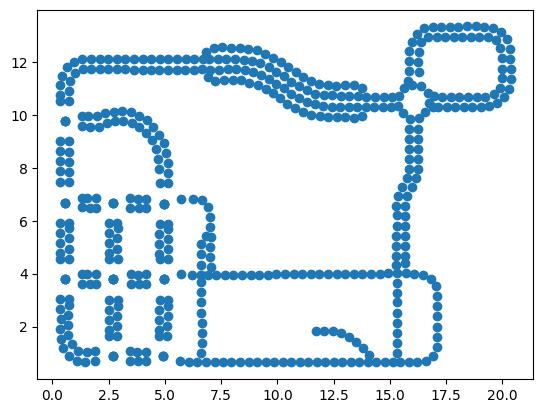

In [1]:
# Fix map graph
import os, sys, cv2 as cv, numpy as np, networkx as nx, matplotlib.pyplot as plt
from os.path import join, exists
from stuff import *
this_file = os.path.abspath('.')
# map_name, k = '2024_Big', K_BIG
# map_name, k = '2024_Medium', K_MEDIUM
map_name, k = '2024_Small', K_SMALL
# map_name, k = '2024_VerySmall', K_VERYSMALL
map_path = join(this_file, f'Simulator/src/models_pkg/track/materials/textures/{map_name}.png')
net_path = join(this_file, 'stuff/Competition_track_graph.graphml')
new_net_path = join(this_file, 'stuff/track_graph.graphml')

# load map
assert exists(map_path)
map = cv.flip(cv.imread(map_path), 0)

# load graph
G = nx.read_graphml(net_path)
print(G.nodes(data=True))
print(G.edges(data=True))

#get max x and max y
max_x = max([n[1]['x'] for n in G.nodes(data=True)])
max_y = max([n[1]['y'] for n in G.nodes(data=True)])

print(f'max_x: {max_x}, max_y: {max_y}')

# Y_OFF, X_OFF = 0.0, 0.0
Y_OFF, X_OFF = -0.12, 0.0

#add offset to all the nodes
for n in G.nodes(data=True):
    n[1]['x'] += X_OFF
    n[1]['y'] += Y_OFF

#convert y
for n in G.nodes(data=True):
    n[1]['y'] = MAP_H_M - n[1]['y']

def draw_nodes_edges(G, map, k):
    #draw all the nodes on the map
    for n in G.nodes(data=True):
        x, y = n[1]['x'], n[1]['y'] 
        cv.circle(map, xy2cv(x,y, k), 15, (0, 0, 255), -1)

    #draw all the edges on the map
    for e in G.edges(data=True):
        x1, y1 = G.nodes[e[0]]['x'], G.nodes[e[0]]['y']
        x2, y2 = G.nodes[e[1]]['x'], G.nodes[e[1]]['y']
        cv.line(map, xy2cv(x1, y1, k), xy2cv(x2, y2, k), (0, 255, 0), 10)
    return map

map = draw_nodes_edges(G, map, k)


nodes_xy = np.array([[n[1]['x'], n[1]['y']] for n in G.nodes(data=True)])
nodes_names = np.array([n[0] for n in G.nodes(data=True)])


#find closest node to a point
def closest_node(x, y):
    dist_2 = np.sum((nodes_xy - np.array([x, y]))**2, axis=1)
    argmin = np.argmin(dist_2)
    return nodes_names[argmin], nodes_xy[argmin][0], nodes_xy[argmin][1], argmin

#show(map)
#create a zoomable window
cv.namedWindow('map', cv.WINDOW_NORMAL)
cv.resizeWindow('map', 1000, 600)

#create a mouse callback function
def draw_circle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        x, y = pix2m(x, k), pix2m(y, k)
        y = MAP_H_M - y
        # cv.circle(map, xy2cv(x, y, k), 60, (255, 0, 255), 5)
        # cv.circle(map, xy2cv(x, y, k), 60, (255, 0, 255), 5)
        print(f'x: {x}, y: {y}')

        #draw an x on the point
        l = .35 #m
        d = l/2
        #pick a random color
        c = (np.random.randint(0, 255), 255, np.random.randint(0, 255))
        cv.line(map, xy2cv(x-d, y, k), xy2cv(x+d, y, k), c, 2)
        cv.line(map, xy2cv(x, y+d, k), xy2cv(x, y-d, k), c, 2)
        cv.circle(map, xy2cv(x, y, k), m2pix(.39/2,k), c, 5)

        #get closest node
        cn, cx, cy, idx = closest_node(x, y)
        #draw a circle around the closest node
        cv.circle(map, xy2cv(cx, cy, k), 20, c, 5)

        #replace the closest node with the new point
        G.nodes[cn]['x'], G.nodes[cn]['y'] = x, y



        


#bind the callback function to window
cv.setMouseCallback('map', draw_circle)

while True:
    cv.imshow('map', cv.flip(map, 0))
    if cv.waitKey(10) & 0xFF == 27:
        break

#redraw the nodes and edges
map = draw_nodes_edges(G, cv.flip(cv.imread(map_path), 0), k)
cv.imshow('map', cv.flip(map, 0))
cv.waitKey(0)

cv.destroyAllWindows()

#plot the nodes on a plot
nodes_xy = np.array([[n[1]['x'], n[1]['y']] for n in G.nodes(data=True)])
nodes_names = np.array([n[0] for n in G.nodes(data=True)])
plt.scatter(nodes_xy[:, 0], nodes_xy[:, 1])
plt.show()

#save the new graph
nx.write_graphml(G, new_net_path)
